In [ ]:
#Class: IST 652  
#Section: M403  
#Assignment: Homework 1  
#Due Date: 5/9/2021 

In [1]:
# import pandas library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# read in the donor data
donordf = pd.read_csv('donors_data.csv', sep=',')

In [2]:
# examine the shape of the data
donordf.shape

(3120, 24)

In [3]:
# Examine the data
donordf.head()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0


In [4]:
# delete the first two columns because they are not meaningful
del donordf['Row Id']
del donordf['Row Id.']


In [5]:
# rename the columns to be easier to understand
donordf.columns =    [ 'Region_1',
                       'Region_2',
                       'Region_3',
                       'Region_4',
                       'homeowner', 
                       'numchildren',
                       'income_d',
                       'gender',
                       'wealth_d', 
                       'homevalue',
                       'income_med', 
                       'income_avg',
                       'lowincome_perc',
                       'numpromos', 
                       'donations_total', 
                       'donations_max', 
                       'donations_last', 
                       'donations_months_since_last', 
                       'donations_months_between_first_second', 
                       'donations_avg',
                       'Donor',
                       'Donation_Amount' ]

# view the dataframe new columns
print(donordf.columns)

# create a new copy of the donor df
donor_table = donordf

Index(['Region_1', 'Region_2', 'Region_3', 'Region_4', 'homeowner',
       'numchildren', 'income_d', 'gender', 'wealth_d', 'homevalue',
       'income_med', 'income_avg', 'lowincome_perc', 'numpromos',
       'donations_total', 'donations_max', 'donations_last',
       'donations_months_since_last', 'donations_months_between_first_second',
       'donations_avg', 'Donor', 'Donation_Amount'],
      dtype='object')


In [6]:
# view of the descriptive stats of the dataset
donor_table.describe()

,Region_1,Region_2,Region_3,Region_4,homeowner,numchildren,income_d,gender,wealth_d,homevalue,...,lowincome_perc,numpromos,donations_total,donations_max,donations_last,donations_months_since_last,donations_months_between_first_second,donations_avg,Donor,Donation_Amount
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,...,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.00000,3120.000000
mean,0.214423,0.185256,0.214423,0.384615,0.770192,1.069231,3.893910,0.609295,6.402244,1141.361859,...,14.702885,49.089423,110.399875,16.651397,13.522917,31.136859,6.861859,10.690713,0.50000,6.499612
std,0.410487,0.388568,0.410487,0.486582,0.420777,0.347688,1.636186,0.487987,2.539978,946.642162,...,12.079882,22.717130,147.299933,22.223521,10.581439,4.132952,5.561209,7.443980,0.50008,10.597849
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,11.000000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,5.000000,556.000000,...,5.000000,29.000000,45.000000,10.000000,7.000000,29.000000,3.000000,6.356092,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,8.000000,822.000000,...,12.000000,48.000000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000,0.50000,0.500000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,8.000000,1338.750000,...,21.000000,65.000000,134.625000,20.000000,16.000000,34.000000,9.000000,12.811652,1.00000,10.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,1.000000,9.000000,5945.000000,...,90.000000,157.000000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667,1.00000,200.000000


In [7]:
# Question 1: Which region has the highest donation total and what gender contributed the most of that donation amount?

In [8]:
# subset the dataframe to have just columns needed
Q1df = donor_table[['Region_1', 'Region_2', 'Region_3', 'Region_4', 'donations_total', 'gender']]

# group by region and gender and sort donation totals by region in ascending order
Question1= Q1df.pivot_table(index = ['Region_1', 'Region_2', 'Region_3', 'Region_4', 'gender'], values = 'donations_total', aggfunc = sum)

# sort by donations
Q1df.sort_values('donations_total', ascending = False)

print(Question1.head(10))

                                            donations_total
Region_1 Region_2 Region_3 Region_4 gender                 
0        0        0        0        0                226.00
                                    1                 63.00
                           1        0              49136.63
                                    1              85122.41
                  1        0        0              24932.32
                                    1              54447.25
         1        0        0        0              25143.50
                                    1              36622.29
1        0        0        0        0              27274.51
                                    1              41479.70


In [ ]:
# Question 1 Answer: Region 4 has the highest donation total and females donated the most in the region at the amount of $85,122.41

In [ ]:
# Question 2: Are there correlations between the average home value, median income, average income,
# and lowincome percentage? Would it make sense to combine any of them?

In [9]:
# subset the dataframe
Q2df = donor_table[['homevalue', 'income_med', 'income_avg', 'lowincome_perc']]

# correlation matrix
Q2df.corr()

,homevalue,income_med,income_avg,lowincome_perc
homevalue,1.000000,0.733773,0.748237,-0.398843
income_med,0.733773,1.000000,0.972409,-0.666637
income_avg,0.748237,0.972409,1.000000,-0.680754
lowincome_perc,-0.398843,-0.666637,-0.680754,1.000000


In [10]:
# Question 2 Answer: income_med and income_avg are almost a perfect positive correlation. One can be removed to reduce noise in the dataset

del donor_table['income_med']

In [11]:
#Question 3: How does wealth affect donation amounts on average and promotions received?

# subset the dataframe to have just columns needed
numpromos_df=pd.DataFrame(donor_table, columns=['numpromos'])
print(numpromos_df)

      numpromos
0            74
1            46
2            32
3            94
4            20
...         ...
3115         23
3116         29
3117         79
3118         27
3119         46

[3120 rows x 1 columns]


In [12]:
# subset the dataframe to have just columns needed
donations_avg_df=pd.DataFrame(donor_table, columns=['donations_avg'])
print(donations_avg_df)

      donations_avg
0          4.857143
1          9.400000
2          4.285714
3          7.080000
4          7.666667
...             ...
3115       7.500000
3116      26.500000
3117      11.157895
3118      20.000000
3119       9.250000

[3120 rows x 1 columns]


In [13]:
# subset the dataframe to have just columns needed
wealth_df=pd.DataFrame(donor_table, columns=['wealth_d'])
print(wealth_df)

      wealth_d
0            9
1            7
2            8
3            4
4            8
...        ...
3115         8
3116         8
3117         7
3118         8
3119         4

[3120 rows x 1 columns]


In [14]:
#joined the mulitple subset dataset together

Numpromos_DonationAvg_wealth = pd.concat([numpromos_df,donations_avg_df,wealth_df], axis= 1, join='inner')
print(Numpromos_DonationAvg_wealth)

      numpromos  donations_avg  wealth_d
0            74       4.857143         9
1            46       9.400000         7
2            32       4.285714         8
3            94       7.080000         4
4            20       7.666667         8
...         ...            ...       ...
3115         23       7.500000         8
3116         29      26.500000         8
3117         79      11.157895         7
3118         27      20.000000         8
3119         46       9.250000         4

[3120 rows x 3 columns]


In [15]:
# group by wealth and sort donations_avg in ascending order
Question3=Numpromos_DonationAvg_wealth.groupby(['wealth_d']).sum().sort_values('donations_avg',ascending =False)
print(Question3)

          numpromos  donations_avg
wealth_d                          
8             62856   18815.637621
9             11799    2358.421126
7             11503    2038.921018
5             11869    1673.299070
3             10504    1617.753905
6             10345    1609.008620
4              9437    1510.095257
2              8556    1397.042128
1              8727    1285.965867
0              7563    1048.881022


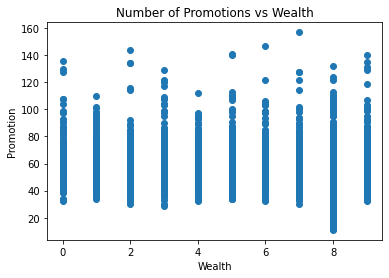

In [16]:
#plotting the results of the correleation of wealth and promotions

plt.plot(Numpromos_DonationAvg_wealth.wealth_d, Numpromos_DonationAvg_wealth.numpromos, 'o')
plt.title('Number of Promotions vs Wealth')
plt.xlabel('Wealth')
plt.ylabel('Promotion')
plt.show()

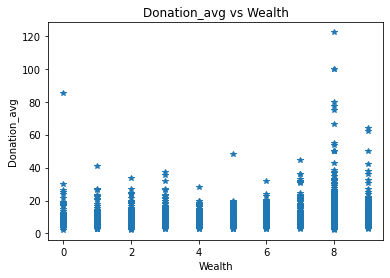

In [17]:
#plotting the results of the correleation of wealth and donations on average
plt.plot(Numpromos_DonationAvg_wealth.wealth_d, Numpromos_DonationAvg_wealth.donations_avg, '*')
plt.title('Donation_avg vs Wealth')
plt.xlabel('Wealth')
plt.ylabel('Donation_avg')
plt.show()

In [ ]:
#Question 3 Answer: There is definitely a relationship between wealth and donation amount.  As the wealth rating increases, the donation amount on average also increases. 
#However, in terms of number of promotions received vs. wealth, there is not a distinct relationship.  The plot shows that regardless of wealth rating, the all the promotions received is relatively the same.